Histogram


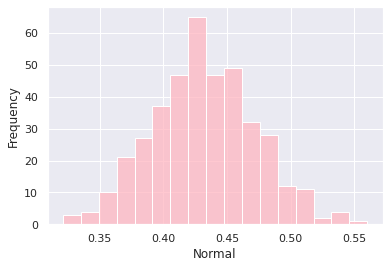

Distributional Plot


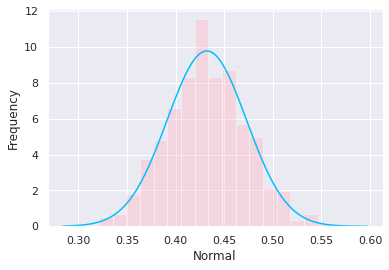

Quantile-Quantile Plots


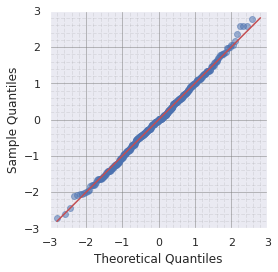

Kolomogorov-Smirnov Test: KstestResult(statistic=0.025244220453834343, pvalue=0.9550891103686073)
Anderson-Darling Test: AndersonResult(statistic=0.1921875542689122, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [10]:
%matplotlib inline

# Inputs
import numpy as np
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
sns.set(color_codes=True)
CDF = norm.cdf
import warnings
warnings.simplefilter(action='ignore')


# Functions
def zscore(x):
  return(x-np.mean(x))/np.std(x)


# Generate the Beta Distribution
beta_data = beta.rvs(a=1.6,b=2.1,size=20000)

#Generate the random samples and the means
trials=400
values = []

for i in range(trials):
  test = np.random.choice(beta_data,size=32,replace= False ,p=None)
  values.append(np.mean(test))

#Generate the Histogram
print('Histogram')
import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.histplot(values,
                  kde=False,
                  color='lightpink')
ax1.set(xlabel='Normal', ylabel='Frequency')
plt.show()

#Generate the Distributional Plot
print('Distributional Plot')
ax2 = sns.distplot(values,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax2.set(xlabel='Normal', ylabel='Frequency')
plt.show()

#Generate the Quantile-Quantile plots
print('Quantile-Quantile Plots')

sm.qqplot((values-np.mean(values))/np.std(values), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

#Conduct the Normality Tests
#Kolmogorov-Smirnov Test
KMT = stats.kstest(zscore(values),'norm')
#Anderson-Darling Test
ADT = stats.anderson(zscore(values),'norm')

#Outputs
print('Kolomogorov-Smirnov Test:',KMT)
print('Anderson-Darling Test:',ADT)